# Cancer Cell Classification using SVM (Support Vector Machines)

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
print('Libraries Imported!')

Libraries Imported!


## Loading the Data

In [4]:
cell_data = pd.read_csv('cell_samples.csv')
cell_data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


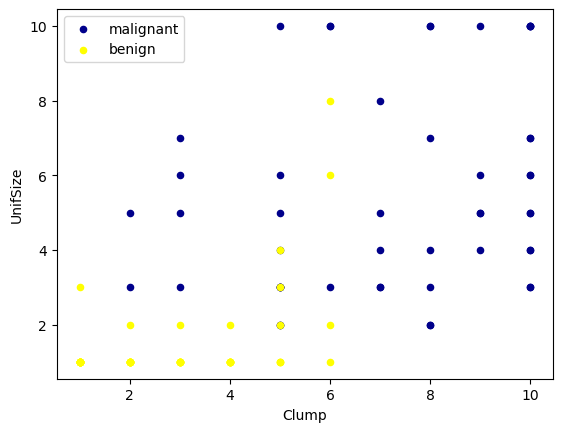

In [5]:
ax = cell_data[cell_data['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_data[cell_data['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [6]:
cell_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [7]:
# Getting rid of 'BareNuc' columns that are not numerical
cell_data = cell_data[pd.to_numeric(cell_data['BareNuc'], errors = 'coerce').notnull()]
# Changing all data types in 'BareNuc' to data type integer
cell_data['BareNuc'] = cell_data['BareNuc'].astype('int')
cell_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [8]:
X = np.asarray(cell_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [10]:
# benign = 2, malignant = 4
y = np.asarray(cell_data['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


## SVM Modeling

In [12]:
from sklearn import svm
ccc = svm.SVC(kernel = 'rbf')
ccc.fit(X_train, y_train)

SVC()

In [13]:
yhat = ccc.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [29]:
# Another way of finding the F1_score as well as the Jaccard Score for accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
print('Average F1-Score: %.4f' % f1_score(y_test, yhat, average = 'weighted'))
print('Jaccard Score: %.4f' % jaccard_score(y_test, yhat, pos_label = 2))

Average F1-Score: 0.9639
Jaccard Score: 0.9444


# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
import itertools

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


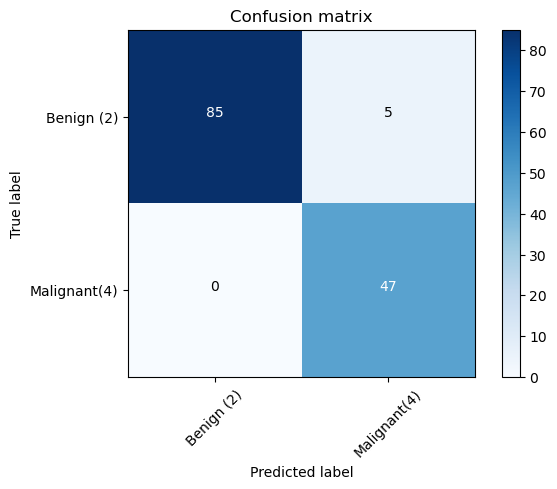

In [25]:
# Computing the confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision = 2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['Benign (2)', 'Malignant(4)'], normalize = False, title = 'Confusion matrix')